In [179]:
import pandas as pd
import numpy as np
from numpy import abs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [180]:

data=pd.read_csv('Mushroom.csv',names=['class','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color',
                'stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring',
                'veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])

data


,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [181]:
data.isnull().sum()


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [182]:
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
data=data.apply(le.fit_transform)
data

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [183]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [184]:
data.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises?                    0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [185]:
dt_new=data.drop(columns=['gill-attachment','veil-color','gill-spacing','stalk-surface-above-ring','stalk-color-above-ring',
                        'stalk-color-below-ring','ring-number','population' ])
print(dt_new.skew())


class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises?                    0.342750
odor                       -0.080790
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-below-ring   -0.757703
veil-type                   0.000000
ring-type                  -0.290018
spore-print-color           0.548426
habitat                     0.985548
dtype: float64


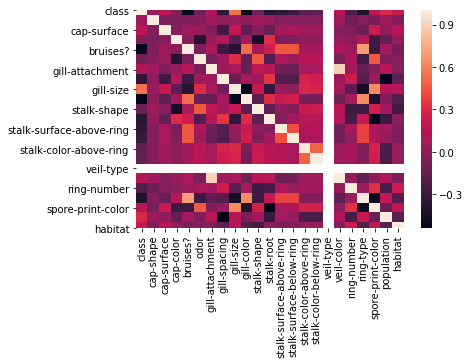

In [186]:
import seaborn as sns
sns.heatmap(data.corr())

In [187]:
x=data.drop(columns=['class'])
y=data['class']
print(x.shape)
print(y)

(8124, 22)
0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32


In [188]:
from sklearn.metrics import mean_squared_error,r2_score
def max_score(reg,x,y):
    max_score=0
    for r in range(45,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
        lg=LogisticRegression()
        lg.fit(x_train,y_train)
        y_pred=lg.predict(x_test)
        r2sc=r2_score(y_test,y_pred)
        if r2sc>max_rsocre:
            max_rsocre=r2sc
            final=r
print('the max_score',max_score ,'is for the final state',r)
print(lg.score(x_train,y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.model_selection import cross_val_score
print(cross_val_score(lg,x,y,cv=5).mean())


the max_score <function max_score at 0x000001AF3EE95048> is for the final state 99
0.6691285081240768
0.6489414081733137
[[625  55  44   0  64   0   0]
 [ 32 380   0  30  36  39   0]
 [ 73   0  98   0  31   0   0]
 [  0  46   0  31   0   0   0]
 [107  78  44   2  69   0   0]
 [  2  30   0   0   0  64   0]
 [  0   0   0   0   0   0  51]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       788
           1       0.65      0.74      0.69       517
           2       0.53      0.49      0.51       202
           3       0.49      0.40      0.44        77
           4       0.34      0.23      0.28       300
           5       0.62      0.67      0.64        96
           6       1.00      1.00      1.00        51

    accuracy                           0.65      2031
   macro avg       0.63      0.62      0.62      2031
weighted avg       0.63      0.65      0.64      2031

0.8439478047846034


In [191]:
max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    sc=SVC()
    sc.fit(x_train,y_train)
    y_pred=sc.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_rsocre:
        max_rsocre=r2sc
        final=r
print('the max_score',max_score ,'is for the final state',r)
print(sc.score(x_train,y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.model_selection import cross_val_score
print(cross_val_score(sc,x,y,cv=5).mean())

the max_score 0 is for the final state 99
1.0
1.0
[[1021    0]
 [   0 1010]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1021
           1       1.00      1.00      1.00      1010

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

0.8640868258178603


In [192]:
max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    kn=KNeighborsClassifier()
    kn.fit(x_train,y_train)
    y_pred=kn.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_rsocre:
        max_rsocre=r2sc
        final=r
print('the max_score',max_score ,'is for the final state',r)
print(kn.score(x_train,y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.model_selection import cross_val_score
print(cross_val_score(kn,x,y,cv=5).mean())

the max_score 0 is for the final state 99
0.999507631708518
0.9985228951255539
[[1020    1]
 [   2 1008]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1021
           1       1.00      1.00      1.00      1010

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

0.881327979354064


In [193]:
max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    dc=DecisionTreeClassifier()
    dc.fit(x_train,y_train)
    y_pred=dc.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_rsocre:
        max_rsocre=r2sc
        final=r
print('the max_score',max_score ,'is for the final state',r)
print(dc.score(x_train,y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.model_selection import cross_val_score
print(cross_val_score(dc,x,y,cv=5).mean())

the max_score 0 is for the final state 99
1.0
1.0
[[1021    0]
 [   0 1010]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1021
           1       1.00      1.00      1.00      1010

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

0.9177724664613074


In [194]:
max_score=0
for r in range(45,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r)
    gb=GaussianNB()
    gb.fit(x_train,y_train)
    y_pred=gb.predict(x_test)
    r2sc=r2_score(y_test,y_pred)
    if r2sc>max_rsocre:
        max_rsocre=r2sc
        final=r
print('the max_score',max_score ,'is for the final state',r)
print(gb.score(x_train,y_train))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
from sklearn.model_selection import cross_val_score
print(cross_val_score(gb,x,y,cv=5).mean())

the max_score 0 is for the final state 99
0.9149844083374364
0.9290989660265879
[[951  70]
 [ 74 936]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1021
           1       0.93      0.93      0.93      1010

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031

0.7262054155964067


In [196]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 1000}

In [197]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
print('cors_val_score mean:',cross_val_score(gbr,x,y,cv=5).mean())
print('cors_val_score std:',cross_val_score(gbr,x,y,cv=5).std())

cors_val_score mean: 0.9256554881183178
cors_val_score std: 0.09549411610419013


In [198]:
from sklearn.externals import joblib
joblib.dump(dc,'Mushroom.pk1')

['Mushroom.pk1']